<h1 style="text-align: center;">App Store Anomolies</h1>
<h4 style="text-align: center;">Stanley Thomas</h4>

---

## Intro

Back in 2014, Steven Cravotta developed a simple iOS game to try and "sharpen [his] coding skillz, and maybe make a quick buck." The game's mechanics consisted of constructing as many words as possible from a given set of letters in some time span. The game was by no means a hit success and life for Cravotta continued as normal. Fast forward 6 years later and Cravotta's game has over 8 million downloads on the App Store. His game, titled "Wordle!", blew up after a similar web-based game named "Wordle" developed by Josh Wardle had come into recent popularity. Cravotta's mobile game had been mistaken for Wardle's game amassing him millions of downloads and a decent amount of revenue as well. 

Cravotta later decided to donate his earnings to charity, but his success is an example of what many developers dream of when publishing games to the app store. After all, the app market has a valuation of over 170 billion dollars and is composed of many large companies solely devoted to game development. However, building a successful game is not easy. Many have tried and failed to garner the audience or addictiveness needed to make a profit on their games. Advertising has also become more and more important in creating games that people will download and even pay for. 

As game development becomes a more lucrative industry we can start to ask, what makes a hit game? Is it complex game mechanics or ripping off other hit games? Does game development success lie in rating and reviews or ease of understanding? The goal of this tutorial is to explore these ideas and more as we analyze thousands of games to see what makes them profitable. We will take advantage of a data set containing information on over 17 thousand apps to see what factors go into making a hit game. 

## Imports

In this tutorial, we will make use of a few python libraries, namely [Pandas](https://pandas.pydata.org/docs/) to store and structure our data, [Numpy](https://numpy.org/doc/stable/index.html) to work with our data, and [Matplotlib](https://matplotlib.org/stable/index.html), [Scikit Learn](https://scikit-learn.org/stable/), and [Seaborn](https://seaborn.pydata.org/) to graph and plot our data. We will also make use of Python's [requests](https://docs.python-requests.org/en/latest/) library as well as [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to show how to scrape webpages to get our data.

In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

import requests, re
from bs4 import BeautifulSoup

Once our external libraries have been imported, we can bring in our dataset to be processed and cleaned. We will be using the dataset linked [here](https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games). This dataset was created by scraping the Apple App Store based on the sitemap linked [here](https://apps.apple.com/us/genre/ios-games/id6014). The dataset we are using is the result of scraping all strategy games as of 2019. If you wanted to make this tutorial your own, you can scrape a different subsection of the games category such as action or adventure. Below is the code to scrape a single web page into a JSON object with some important information. You can extrapolate this to scrape an entire category of games, or any other app category using the Python requests library and BeautifulSoup. 

## Data Collection

In [503]:
# replace this with the url of the page you want to scrape
url = "https://apps.apple.com/us/app/trivia-puzzle-fortune-games/id1565866365"

r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')

app_data = soup.find('script', {'id': 'shoebox-media-api-cache-apps'}).contents[0]


# parse out important information
data = {
    'URL': url,
    'ID': soup.find('meta', {'name': 'apple:content_id'})['content'],
    'Name': soup.find('meta', {'property': 'og:title'})['content'],
    'Icon URL': soup.find('meta', {'property': 'og:image'})['content'],
    'Description': soup.find('meta', {'property': 'og:description'})['content'],
    'Developer': soup.find('span', {'class':'app-privacy__developer-name'}).get_text(),
    'Average User Rating': soup.find('span', {'class':'we-customer-ratings__averages__display'}).get_text(),
    'User Rating Count': re.search(r'ratingCount\\":(\d*)', app_data).group(1),
    'Price': re.search(r'price\\":(\d*).\d*', app_data).group(1),
    'Age Rating': re.search(r'name\\":\\"(\d+\+)', app_data).group(1),
    'Size': re.search(r'size\\":(\d*)', app_data).group(1)
    
}

For this tutorial we will be using the pre-scraped dataset linked [here](https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games). To import this dataset, download the csv file and upload it into your project. If you chose to scrape the data yourself, you will need to export your data as a csv file. Then we can use the code below to create a Pandas dataframe from our csv file to work with later. 

In [504]:
df = pd.read_csv('./appstore.csv')
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


## Data Parsing

Our dataset has 18 columns:

`'URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating','User Rating Count', 'Price', 'In-app Purchases', 'Description','Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre','Genres', 'Original Release Date', 'Current Version Release Date'`. 

The first step is to clean up our data by removing any columns we don't need. We can remove the 'ID' column since it contains information repeated in the 'URL' column, as well as the 'Primary Genre' column since its information is repeated in the 'Genres' column. The 'Subtitle' column contains mostly NaN values so this can be deleted as well. We can also get rid of the 'Original Release Date', 'Current Version Release Date', 'In-app Purchases', and 'User Rating Count' columns since these won't help us in our later analysis. We can use the pandas [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) function to do this with the code below.

In [505]:
# deletes unnecessary columns
df = df.drop(columns=['ID', 'Primary Genre', 'Subtitle', 
                 'In-app Purchases', 'Original Release Date', 'Current Version Release Date'])

While cleaning our data we will also need to create new columns and modify existing ones. Firstly, we need to edit the 'Age Rating' column so the values are numeric and thus can be compared with each other. In terms of the 'Languages' column, it might be interesting to analyze how many languages an app supports so we can add a column called 'num_languages' which counts the number of languages. We also will add a column named 'is_free' containing a boolean value of whether or not an app is free or paid. 

Lastly, we want to rename our columns for ease of access when doing data analysis. The renaming mainly consists of replacing whitespaces with underscores and removing capitalization in general. After processing our data we are left with 12 columns: 

`'url', 'name', 'icon_url', 'rating', 'price', 'description',
       'developer', 'bytes', 'genres', 'age_rating', 'num_languages'`

From here we can begin to analyze our data and explore the relationships within our data. 

In [506]:
# map of age ratings to numeric value
m = {'4+': 0, '9+': 1, '12+': 2, '17+': 3}

# adds a column called 'age_rating' that maps each age rating to a value
df['age_rating'] = df.apply(lambda row: m[row['Age Rating']] , axis = 1) 

# adds a column called 'num_languages' that counts the number of languages an app supports
df['num_languages'] = df.apply(lambda row: len(str(row['Languages']).split(',')), axis = 1)

# adds a column called 'is_paid' which tells if an app is free or not
df['is_paid'] = df.apply(lambda row: row['Price'] > 0, axis = 1)

# removes all columns where rating does not exist
df = df[df['Average User Rating'].notnull()]

# deletes old age rating and languages columns
df = df.drop(columns=['Age Rating', 'Languages'])

# renames columns
df = df.rename(columns={'URL': 'url', 'Name': 'name', 'Icon URL': 'icon_url', 'Average User Rating':'rating', 
                        'User Rating Count': 'num_ratings', 'Price': 'price', 'Description': 'description', 
                        'Developer': 'developer', 'Size': 'bytes', 'Genres': 'genres'})

df.head()

,url,name,icon_url,rating,num_ratings,price,description,developer,bytes,genres,age_rating,num_languages,is_paid
0,https://apps.apple.com/us/app/sudoku/id284921427,Sudoku,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,15853568.0,"Games, Strategy, Puzzle",0,17,True
1,https://apps.apple.com/us/app/reversi/id284926400,Reversi,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,"The classic game of Reversi, also known as Oth...",Kiss The Machine,12328960.0,"Games, Strategy, Board",0,1,True
2,https://apps.apple.com/us/app/morocco/id284946595,Morocco,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,Play the classic strategy game Othello (also k...,Bayou Games,674816.0,"Games, Board, Strategy",0,1,False
3,https://apps.apple.com/us/app/sudoku-free/id28...,Sudoku (Free),https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,21552128.0,"Games, Strategy, Puzzle",0,17,False
4,https://apps.apple.com/us/app/senet-deluxe/id2...,Senet Deluxe,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,34689024.0,"Games, Strategy, Board, Education",0,15,True


## Data Analysis

Now that our data has been parsed we can begin to try and answer some questions using our data.  We can try and look at the 'ratings' column to see how ratings are spread out across apps. Ratings are split by 0.5 intervals from 0-5, and in terms of genres, there are 41 unique genres of games. We can create a heatmap of genres and ratings to see how often each rating is hit, and how they are spread out across different genres. First we will have to create a 2d array, counting the number of times a rating occurs for each genre. Then we can use Matplotlib to create a heatmap where each cell contains the number of ratings for that genre/rating combo.  

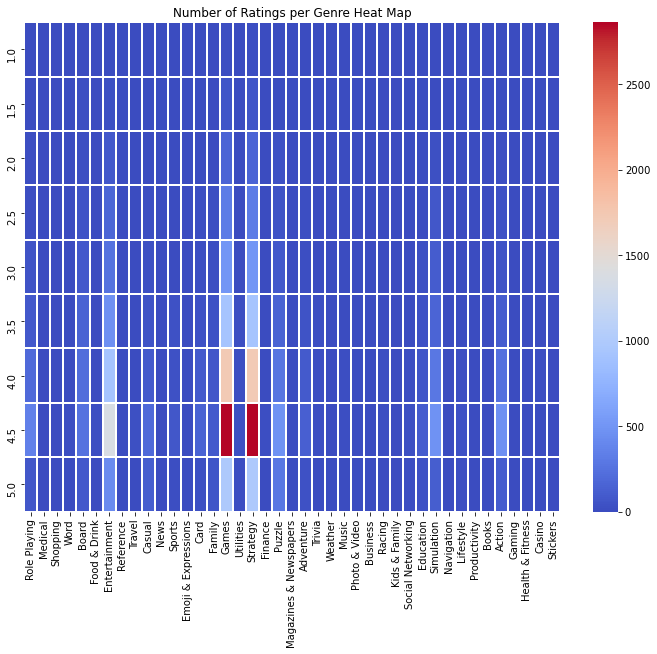

In [507]:
# creates a set of all unique genres
genres = set()
for g in df['genres'].unique():
    lst = g.split(',')
    lst = list(map(lambda x: x.strip(), lst))
    genres.update(lst)

# creates a 2d array where each cell contains the number of ratings for a particular genre/ rating combo
arr = []
for rating in np.sort(df['rating'].unique()):
    row = []
    for genre in genres:
        row.append(len(df[(df['genres'].str.contains(genre)) & (df['rating'] == rating)]))
    arr.append(row)
arr = np.array(arr)
f, ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap( arr ,  xticklabels=genres, yticklabels=np.sort(df['rating'].unique()), linewidth = 1 , cmap = 'coolwarm')

plt.title( "Number of Ratings per Genre Heat Map" )
plt.show()

Our data set is based on analyzing strategy games so it makes sense that the darkest spots in our heatmap lie in the Games and Strategy genres. What is interesting is to look at the other categories as well as ratings that show up as more prominent in the heat map. At first glance we can see that a lot of the ratings gather around the 4 - 4.5 mark. It is also interesting to see the natural gradient across the y-axis meaning that the ratings follow an even distribution. If we plot the ratings of a single genre we would expect to see a smooth curve in most genres. 

Another relationship we can analyze is between age rating and point rating. We can see if more mature games are rated more or less highly than less mature games. Once again we will construct the heatmap in the same way using a 2d array as we did previously with the code above, but this time grouping by age rating. 

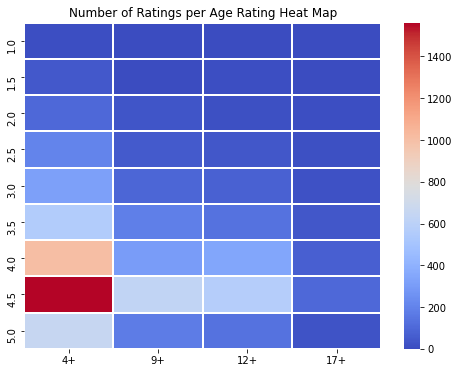

In [508]:
# creates a 2d array where each cell contains the number of ratings for a particular age rating/ rating combo
arr = []
ages = ['4+', '9+', '12+', '17+']
for rating in np.sort(df['rating'].unique()):
    row = []
    for group in np.sort(df['age_rating'].unique()):
        row.append(len(df[(df['age_rating'] == group) & (df['rating'] == rating)]))
    arr.append(row)
    
arr = np.array(arr)
f, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap( arr ,  xticklabels=ages, yticklabels=np.sort(df['rating'].unique()), linewidth = 1 , cmap = 'coolwarm')

plt.title( "Number of Ratings per Age Rating Heat Map" )
plt.show()

Once again we see a similar pattern as we did when looking at the Ratings vs Genre heatmap in that most of the ratings are concentrated around the 4 - 4.5 rating mark. We also can see that more ratings lie in the lower age rating categories. We can theorize that more people are playing games that are available to more audiences, and thus there are much more reviews and ratings for them. 

We can also take a look at the ratings of each app to see if we can pinpoint what factors may affect the rating of our app. Is it games with a wider audience or maybe cheaper games? First, we can look at the price vs. ratings to see if more expensive games mean higher ratings. We can do this by first only looking at paid games since free games would skew our dataset. Then once again we can use Matplotlib to create a scatter plot of price vs. rating to see if there is any correlation. After creating this scatter plot we can take advantage of Scikit's linear regression functions to create a linear regression model of our data. Once this is done we can plot both the scatter plot and the linear regression line to see if there is indeed a relationship between the two. 

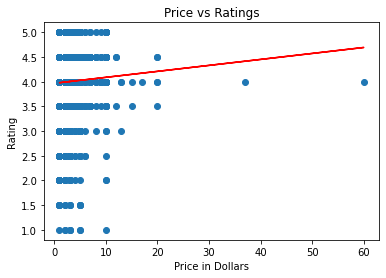

Slope of best fit line: 0.012090516771167362


In [509]:
# creates a new dataframe of only paid apps under $100
paid_df = df[(df['is_paid'] == True) & (df['price'] < 100)]

# sets up the linear regression model
lm = linear_model.LinearRegression()
x = np.array(paid_df['price']).reshape(-1,1)
y = np.array(paid_df['rating'])
lm.fit(x, y)

# plots the data line of best fit
fig, ax = plt.subplots()

ax.set_title("Price vs Ratings")
ax.set_xlabel("Price in Dollars")
ax.set_ylabel("Rating")

ax.scatter(paid_df['price'], paid_df['rating'])
ax.plot(np.array(paid_df['price']).reshape(-1,1), lm.predict(np.array(paid_df['price']).reshape(-1,1)), color='red')
plt.show()

print("Slope of best fit line: " + str(lm.coef_[0]))

The scatter plot above helps us compare the relationship between the price of apps on the app store and how highly they are rated. At first glance, we can notice that the data is spread evenly with some outliers around the 4.0 rating mark. Looking at our line we can see a slightly positive slope meaning that there is some correlation between how highly an app is rated and how much it costs. The slope of the line is around 0.01 meaning that for every dollar more an app costs, its ratings should theoretically increase by 0.01 points. Of course, this does not mean that because an app costs more money, it is rated higher, but it is interesting to look at the correlation between these two fields. 

After creating the scatterplot above I wondered if we could create a stronger positive relationship between ratings and some other field. For example, does the number of languages an app supports have anything to do with how high it is rated on the app store? To test this I repeated the steps above, but this time I used the 'num_languages' column instead of the 'price' column. The code below creates a scatter plot of the number of languages supported vs. rating, then creates a linear regression line and plots it on top. 

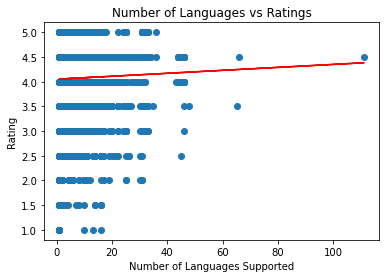

Slope of best fit line: 0.00299752449632021


In [510]:
# sets up the linear regression model
lm = linear_model.LinearRegression()
x = np.array(df['num_languages']).reshape(-1,1)
y = np.array(df['rating'])
lm.fit(x, y)

# plots the data line of best fit
fig, ax = plt.subplots()

ax.set_title("Number of Languages vs Ratings")
ax.set_xlabel("Number of Languages Supported")
ax.set_ylabel("Rating")

ax.scatter(df['num_languages'], df['rating'])
ax.plot(np.array(df['num_languages']).reshape(-1,1), lm.predict(np.array(df['num_languages']).reshape(-1,1)), color='red')
plt.show()

print("Slope of best fit line: " + str(lm.coef_[0]))

From the code above we see that there is almost no relationship between the number of languages supported and the rating of a game. Although one might theorize that the broader the reach an app has, the higher its ratings - the slope of the best fit line is close enough to zero where we can say that there is no relationship.

## Hypothesis Testing

Now that we have explored our data somewhat, we can begin to see if we can seek out answers to our initial questions of what makes an app successful and how can we make a hit app? A part of the motivation behind this tutorial comes from the plethora of mobile game ads that have begun to dominate Youtube as well as other games. Most people should be familiar with ads for simple-minded candy crush knockoffs that seem to dominate ads on every platform. There is an enormous budget for ads for mobile games - which means that these ads work. They do their job of either annoying users into paying a few extra dollars to go add-free, or interesting users into actually downloading the app. Ads have gotten so good that you can even test out an app before downloading or playing it. 

Analyzing this data, however, is difficult mainly due to the lack of good data on how much companies spend on advertising and app development. However, we can still look at the other factors that may make a git an addicting pastime. My key takeaway is that **successful games are often simple and novel**. We can explore these two hypotheses by looking at relationships in our data to come to a conclusion. 

---

Before we can start to test our hypothesis we need to quickly define what a "successful" game is. Since it is hard to access data on app profits we can only consider potential profit as a category for success. To do this we can use the "num_ratings" column as well as the "price" column for all paid apps and calculate a "min_profit" column that holds the minimum amount of money the app has made. This number is a gross underestimate since only a small percentage of people who buy an app chose to leave a review. It is also possible that in some cases, people review apps more than in other cases - meaning that our comparisons would be inaccurate if a less profitable game was reviewed more than a more profitable game, skewing our num

To implement our definition of success we will have to create a new column named "min_profit." This column will contain the minimum amount of profit we know a paid app has made and will allow us to compare the success of paid apps in our analysis. To do this we simply multiply the number of reviews against the price of the app to get our value. 

In [511]:
# adds a column called 'min_profit' containing the minimum amount of profit an app has made
df['min_profit'] = df.apply(lambda row: row['num_ratings'] * row['price'] , axis = 1) 
df.head()

,url,name,icon_url,rating,num_ratings,price,description,developer,bytes,genres,age_rating,num_languages,is_paid,min_profit
0,https://apps.apple.com/us/app/sudoku/id284921427,Sudoku,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,15853568.0,"Games, Strategy, Puzzle",0,17,True,10623.47
1,https://apps.apple.com/us/app/reversi/id284926400,Reversi,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,"The classic game of Reversi, also known as Oth...",Kiss The Machine,12328960.0,"Games, Strategy, Board",0,1,True,565.16
2,https://apps.apple.com/us/app/morocco/id284946595,Morocco,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,Play the classic strategy game Othello (also k...,Bayou Games,674816.0,"Games, Board, Strategy",0,1,False,0.00
3,https://apps.apple.com/us/app/sudoku-free/id28...,Sudoku (Free),https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,21552128.0,"Games, Strategy, Puzzle",0,17,False,0.00
4,https://apps.apple.com/us/app/senet-deluxe/id2...,Senet Deluxe,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,34689024.0,"Games, Strategy, Board, Education",0,15,True,83.72


First, we can look at the simplicity of a game as one indicator of how well a game will do on the app store. In terms of simplicity, we can define simple games as having simple mechanics and simple goals. However, building a dataset that includes this information is tedious and almost impossible. A quick shortcut we can use, however, is to look at the size of an app. Large open-world games with complicated controls are often much much larger in size than simple puzzle games. Take a game like Asphalt 8 coming in at 3.3 GB whereas a game like 2048 clocks in at around 65 KB. The discrepancies in size often are a result of discrepancies in the complexity of gameplay. 

We can take advantage of this idea and say - with a simplifying assumption - that the smaller an app is, the simpler its mechanisms are. Thus we can test our hypothesis that simpler apps do better, but comparing the size of an app to its profit and ratings. In our code below we create a scatter plot comparing the rating of an app with its size in bytes. We use Matplotlib to create the plot and then Scikitlearn to plot a regression line on top:

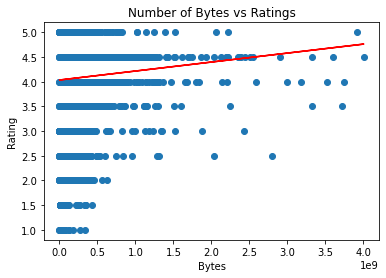

Slope of best fit line: 1.815449110369132e-10


In [512]:
# sets up the linear regression model
lm = linear_model.LinearRegression()
x = np.array(df['bytes']).reshape(-1,1)
y = np.array(df['rating'])
lm.fit(x, y)

# plots the data line of best fit
fig, ax = plt.subplots()

ax.set_title("Number of Bytes vs Ratings")
ax.set_xlabel("Bytes")
ax.set_ylabel("Rating")

ax.scatter(df['bytes'], df['rating'])
ax.plot(np.array(df['bytes']).reshape(-1,1), lm.predict(np.array(df['bytes']).reshape(-1,1)), color='red')
plt.show()

print("Slope of best fit line: " + str(lm.coef_[0]))

In our analysis, we can see that there is a slight positive correlation between how large an app is and how well it is rated. The slope of this line is also much larger than that of the number of languages and the price of an app. The slope above tells us that for every 1 byte larger an app is, its ratings are usually 1.8 x 10^-10 points higher. In more readable terms for every gigabyte larger an app is, its ratings are usually 1 point higher.

This contradicts our initial hypothesis that smaller apps will be rater higher. 

We can also take a look at paid apps with the code below that fits a linear regression model on top of a scatterplot of min_profit vs. ratings. 

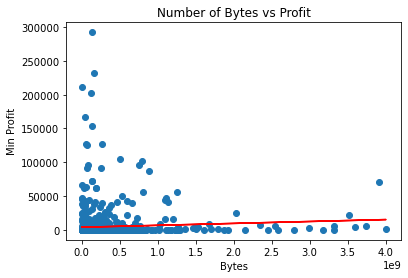

Slope of best fit line: 2.8363790732039773e-06
Number of apps smaller than 1 GB: 7448
Number of apps larget than 1 GB: 113


In [513]:
paid_df = df[df['is_paid'] == True]

# sets up the linear regression model
lm = linear_model.LinearRegression()
x = np.array(paid_df['bytes']).reshape(-1,1)
y = np.array(paid_df['min_profit'])
lm.fit(x, y)

# plots the data line of best fit
fig, ax = plt.subplots()

ax.set_title("Number of Bytes vs Profit")
ax.set_xlabel("Bytes")
ax.set_ylabel("Min Profit")

ax.scatter(paid_df['bytes'], paid_df['min_profit'])
ax.plot(np.array(paid_df['bytes']).reshape(-1,1), lm.predict(np.array(paid_df['bytes']).reshape(-1,1)), color='red')
plt.show()

print("Slope of best fit line: " + str(lm.coef_[0]))

print("Number of apps smaller than 1 GB: " + str(len(df[df['bytes'] < 1000000000])))
print("Number of apps larget than 1 GB: " + str(len(df[df['bytes']  > 1000000000])))

From the scatterplot above we can also see a slight positive relationship between profit and the size of an app. At first glance, it seems that the relationship should be negative, but the large concentration of small apps with small profits creates a best fit line with a positive slope. This graph, along with the graph measuring ratings of apps in relation to size of the app, both point toward the conclusion that the larger an app is the more "success" it has. 

In retrospect, it makes sense that larger more complex apps often outlive simple apps that are more like fads than addicting games. Lager apps would make sense to in the longer term churn a higher profit as well as be more highly rated. Looking at the number of smaller apps in our data, it also may be that small apps only seem to be successful because of the sheer number of them produced by mobile game companies. Running the code below reveals that from our dataset over 7000 apps are smaller than 1 GB while only 113 are larger than 1 GB. Since there are more small apps, I predicted that they would have greater individual success, but it seems like based on the data larger apps are more successful in the end. 

---

Our next step is to test the second phase of our hypothesis which has to do with measuring the novelty of an app. Novelty is an interesting problem to consider since many apps nowadays are just rip-offs of more popular apps with a few tweaks here and there. To measure the novelty of each app we will use the description of each app. We will use a technique similar to that of [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) to find out how unique each description is.

The basic idea for this step is to first compile a list of all unique words across all of our app descriptions. Then for each app, we can create a vector corresponding to this list of unique words, where the value is the number of occurrences of a certain word in its description. Once we have created vectors for each app description, we can find which vector is least similar to all the others by first finding a mean vector, and then finding the distance between each vector and the mean vector. This number will be our novelty score. If a vector is similar to a lot of other vectors, it will have a low uniqueness score since the distance will be small. On the other hand, if a vector is dissimilar, its distance will be larger and so will its uniqueness score. 

In [514]:
# creates a set of all unique words
words = {''}
length = len(df)

for index, row in df.iterrows():
    lst = list(map(lambda x: x.lower(), re.split(r' |\\n|\\u', row['description'])))
    lst = list(filter(lambda x: len(x) >= 5, lst))
    words.update(lst)
    
words = list(words)

In [515]:
# creates vectors based on occurences of words in description
cols = []
count = 0

for index, row in df.iterrows():    
    count += 1
    vector = np.zeros(len(words))
    
    lst = list(map(lambda x: x.lower(), re.split(r' |\\n|\\u', row['description'])))
    lst = list(filter(lambda x: len(x) >= 5, lst))

    for word in lst:
        vector[words.index(word)] += 1
    cols.append(vector)
    print(str(count) + "/" + str(length), end='\r')

df['vector'] = cols

In [516]:
# finds mean vector
mean = np.mean(cols, axis=0)
sums = []

# find distance between each vector and mean vector
for index, row in df.iterrows():
    s = 0;    
    v = row['vector']
    s += np.sum(np.square(v - mean))
    sums.append(s)

df['novelty'] = sums

After running the code above we have calculated a uniqueness or novelty score for each app in our dataset. Our next step is to graph our results to see if there is indeed a correlation. Similar to before, we will first create a new dataframe that contains a majority of the novelty scores (since there are a few outliers that make the graph difficult to read). Then we will create a scatter plot using Matplotlib of novelty score vs. ratings and plot a regression line on top of this using Scikitlearn. 

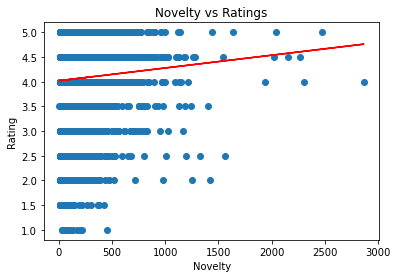

In [517]:
normal = df[df['novelty'] < 4000] 

# sets up the linear regression model
lm = linear_model.LinearRegression()
x = np.array(normal['novelty']).reshape(-1,1)
y = np.array(normal['rating'])
lm.fit(x, y)

# plots the data line of best fit
fig, ax = plt.subplots()

ax.set_title("Novelty vs Ratings")
ax.set_xlabel("Novelty")
ax.set_ylabel("Rating")

ax.scatter(normal['novelty'], normal['rating'])
ax.plot(np.array(normal['novelty']).reshape(-1,1), lm.predict(np.array(normal['novelty']).reshape(-1,1)), color='red')
plt.show()

Looking at our graph above we can see that there is indeed a positive correlation between novelty and the rating of an app. The slope of the line is positive enough to where we can say there is a correlation between how novel or unique an app's description is, and how well it does on the app store.

We can also look at success for paid apps by looking at novelty vs. min_profit. We can once again create a new dataframe containing only paid apps, then repeat the steps above to get a scatter plot and best fit line. 

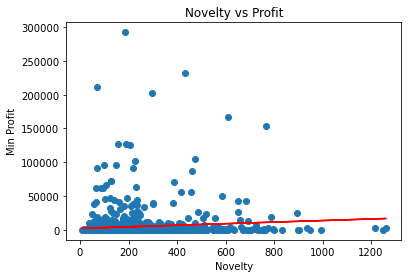

In [518]:
paid_df = df[(df['novelty'] < 4000) & (df['is_paid'] == True)] 

# sets up the linear regression model
lm = linear_model.LinearRegression()
x = np.array(paid_df['novelty']).reshape(-1,1)
y = np.array(paid_df['min_profit'])
lm.fit(x, y)

# plots the data line of best fit
fig, ax = plt.subplots()

ax.set_title("Novelty vs Profit")
ax.set_xlabel("Novelty")
ax.set_ylabel("Min Profit")

ax.scatter(paid_df['novelty'], paid_df['min_profit'])
ax.plot(np.array(paid_df['novelty']).reshape(-1,1), lm.predict(np.array(paid_df['novelty']).reshape(-1,1)), color='red')
plt.show()

Here we can once again see that there does exist a slight positive slope to our regression line telling us that there is some correlation between how novel an app is and how much profit it makes. From this and our previous graph, we can conclude that there may be a relationship between how unique an app's description is to how well it does. This supports our initial hypothesis that for an app to do better on the app store it should be unique and not a rip-off of other games. 

## Conclusions


Through our analysis, we have explored many parts of the dataset on apps from the Apple app store. We looked at heat maps of our data to get a better understanding of how our data was spread out, and we looked at a lot of different scatter plots to get a better idea of the relationships between different parts of our data. After analyzing our data, we created a hypothesis that simple and novel apps do better on the app store. We then were able to explore this idea by looking at scatter plots of how well an app performs correlated with how large it was or how novel it was. From our testing, we found that larger or more complex apps are often rated higher and bring in more revenue than simpler apps. We also found that the more unique an app's description was, the higher or more profitable it seemed to be. 

There are still many different areas to explore this dataset and ways to make this tutorial your own. You can always take a look at the app icons, included in the dataset, to see if an app's icon has any influence on how well it does on the app store. One might theorize that maybe more colorful or more unique app icons can have some correlation with how well the app does. Beyond this, there is so much more data left to be explored and analyzed within the Apple App Store. In our Data Collection step, I outlined the code for scraping a single page into a JSON object with data about the app. You can always look at different genres of games, or different kinds of apps, in general, to see if you can make any meaningful analysis on these. This tutorial provides the baseline for you to be able to explore data science and gives you a sample of what can be done by analyzing data. 